### Importing Libraries

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

### Loading and Preparing Data

In [17]:
# Load the data
file_path = '/Users/alexdy/Desktop/3/NFLX_Feature_Mart.csv'
data = pd.read_csv(file_path)

# Clean column names - remove special characters and standardize format
data.columns = (
    data.columns.str.replace("[()']", '', regex=True)
    .str.replace(", ", '_', regex=False)
    .str.strip()
)

data = data.drop(["Open", "High", "Low", "Close", "Adj Close","Daily_Return"], axis=1)
 
# Select numeric columns for feature selection
# Target variable is 'Returns' - daily stock returns
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
target_column = 'Returns'
feature_columns = [col for col in numeric_columns if col != target_column]

# Prepare features (X) and target variable (y)
X = data[feature_columns]
y = data[target_column]

# Scale features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Correlation Analysis

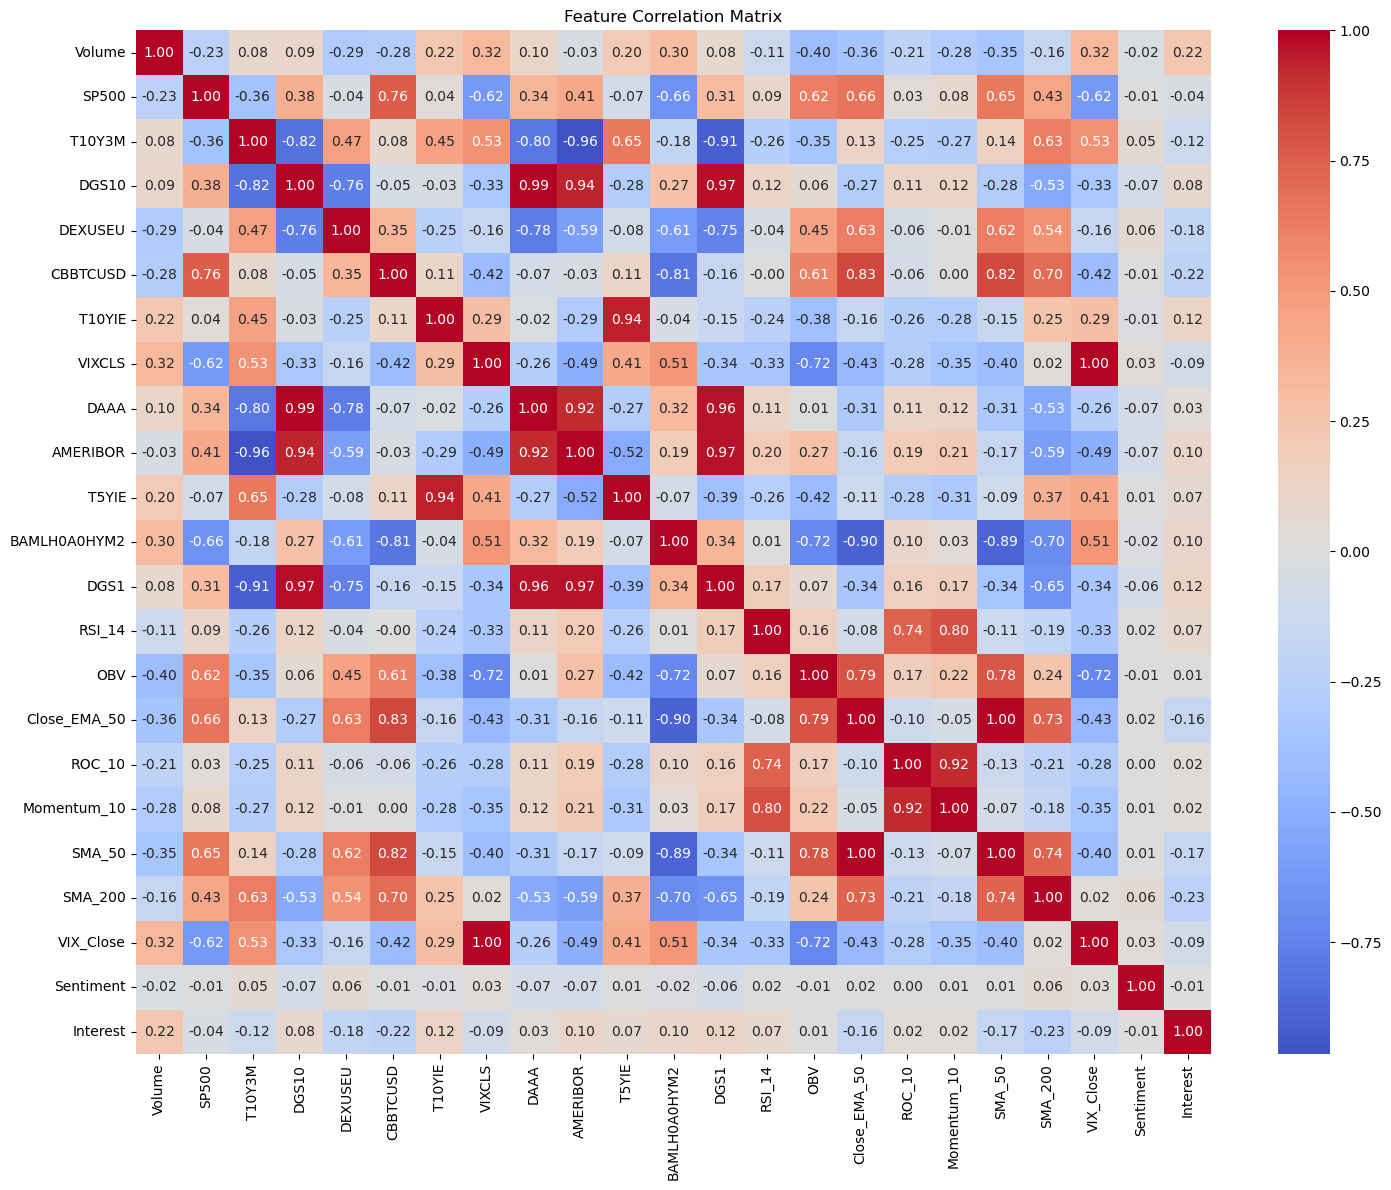

In [18]:
# Function to plot correlation matrix
def plot_correlation_matrix(X, features):
    """
    Create and plot correlation matrix heatmap for features
    """
    plt.figure(figsize=(15, 12))
    correlation_matrix = pd.DataFrame(X, columns=features).corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()

# 1. Correlation Analysis
plot_correlation_matrix(X, feature_columns)

### Feature Importance Visualization

In [19]:
# Enhanced feature importance visualization function
def plot_feature_importance(importances, features, title, top_n=15):
    """
    Plot feature importance with enhanced styling
    Parameters:
    - importances: array of feature importance scores
    - features: list of feature names
    - title: plot title
    - top_n: number of top features to display (default=15)
    """
    indices = np.argsort(importances)[::-1][:top_n]
    plt.figure(figsize=(12, 8))
    
    # Create gradient colors for bars
    colors = plt.cm.viridis(np.linspace(0, 0.8, top_n))
    
    # Plot horizontal bars
    bars = plt.barh(range(top_n), importances[indices], align='center', color=colors)
    plt.yticks(range(top_n), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.title(title)
    
    # Add value labels on bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='left', va='center')
    
    plt.tight_layout()
    plt.show()

### Feature Stability Analysis

In [20]:
# Feature stability analysis function
def evaluate_feature_stability(model, X, y, features, n_splits=5):
    """
    Evaluate feature importance stability using time series cross-validation
    """
    tscv = TimeSeriesSplit(n_splits=n_splits)
    feature_importance_scores = []
    
    for train_idx, val_idx in tscv.split(X):
        X_train_cv, X_val_cv = X[train_idx], X[val_idx]
        y_train_cv, y_val_cv = y[train_idx], y[val_idx]
        
        model.fit(X_train_cv, y_train_cv)
        
        # Get feature importance based on model type
        if hasattr(model, 'feature_importances_'):
            importance = model.feature_importances_
        else:
            importance = np.abs(model.coef_)
            
        feature_importance_scores.append(importance)
    
    stability_scores = np.std(feature_importance_scores, axis=0)
    
    # Create stability analysis DataFrame
    stability_df = pd.DataFrame({
        'Feature': features,
        'Stability Score': stability_scores
    }).sort_values('Stability Score')
    
    print(f"\n{type(model).__name__} Feature Stability Analysis:")
    print(stability_df)
    
    return stability_scores

### Feature Selection Methods


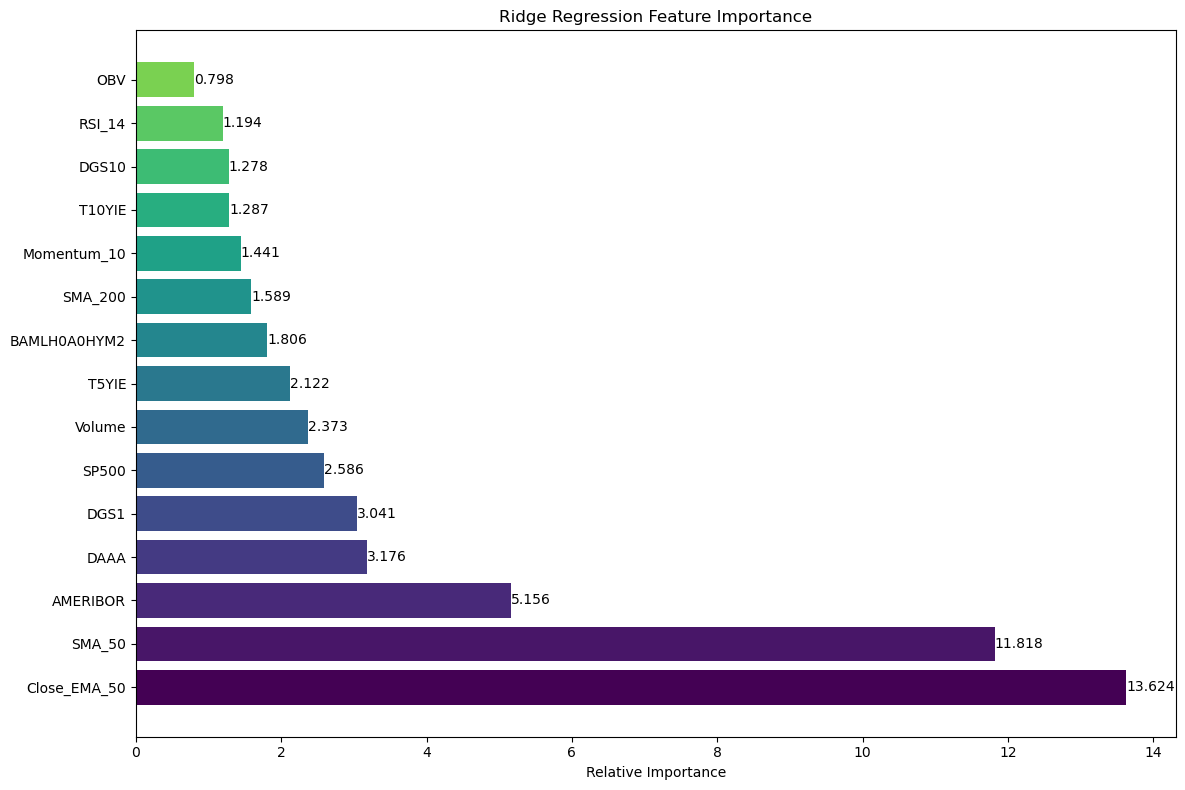


Ridge Feature Stability Analysis:
         Feature  Stability Score
21     Sentiment         0.147648
22      Interest         0.299259
5       CBBTCUSD         0.381586
20     VIX_Close         0.430664
7         VIXCLS         0.474350
2         T10Y3M         0.494576
17   Momentum_10         0.539413
13        RSI_14         0.548758
3          DGS10         0.651902
11  BAMLH0A0HYM2         0.773436
6         T10YIE         0.779174
16        ROC_10         0.921481
14           OBV         1.028610
10         T5YIE         1.106879
19       SMA_200         1.386139
12          DGS1         1.479744
1          SP500         1.512789
0         Volume         2.162192
8           DAAA         2.221619
15  Close_EMA_50         2.894037
4        DEXUSEU         3.148216
18        SMA_50         3.831849
9       AMERIBOR         4.340650


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.527e+02, tolerance: 1.110e+01
  model = cd_fast.enet_coordinate_descent(


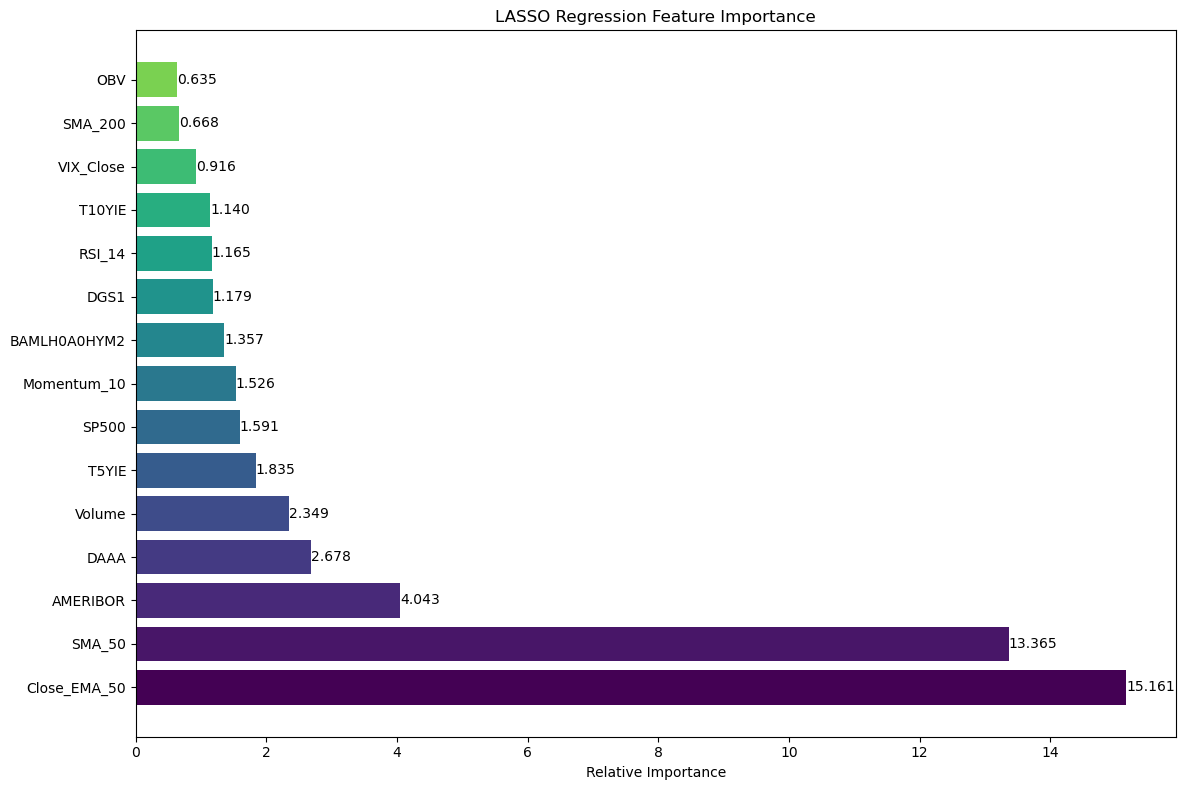

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+01, tolerance: 4.415e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.605e+02, tolerance: 6.860e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.078e+03, toler


Lasso Feature Stability Analysis:
         Feature  Stability Score
21     Sentiment         0.179356
22      Interest         0.259186
5       CBBTCUSD         0.357722
7         VIXCLS         0.507267
17   Momentum_10         0.554741
13        RSI_14         0.622119
20     VIX_Close         0.728218
16        ROC_10         0.978888
11  BAMLH0A0HYM2         1.109531
12          DGS1         1.510220
6         T10YIE         2.036368
3          DGS10         2.224694
0         Volume         2.360695
1          SP500         2.698563
4        DEXUSEU         3.199868
15  Close_EMA_50         4.124460
18        SMA_50         4.141347
14           OBV         4.431475
2         T10Y3M         5.131010
10         T5YIE         5.230110
19       SMA_200         6.316163
9       AMERIBOR         6.512057
8           DAAA        10.482576


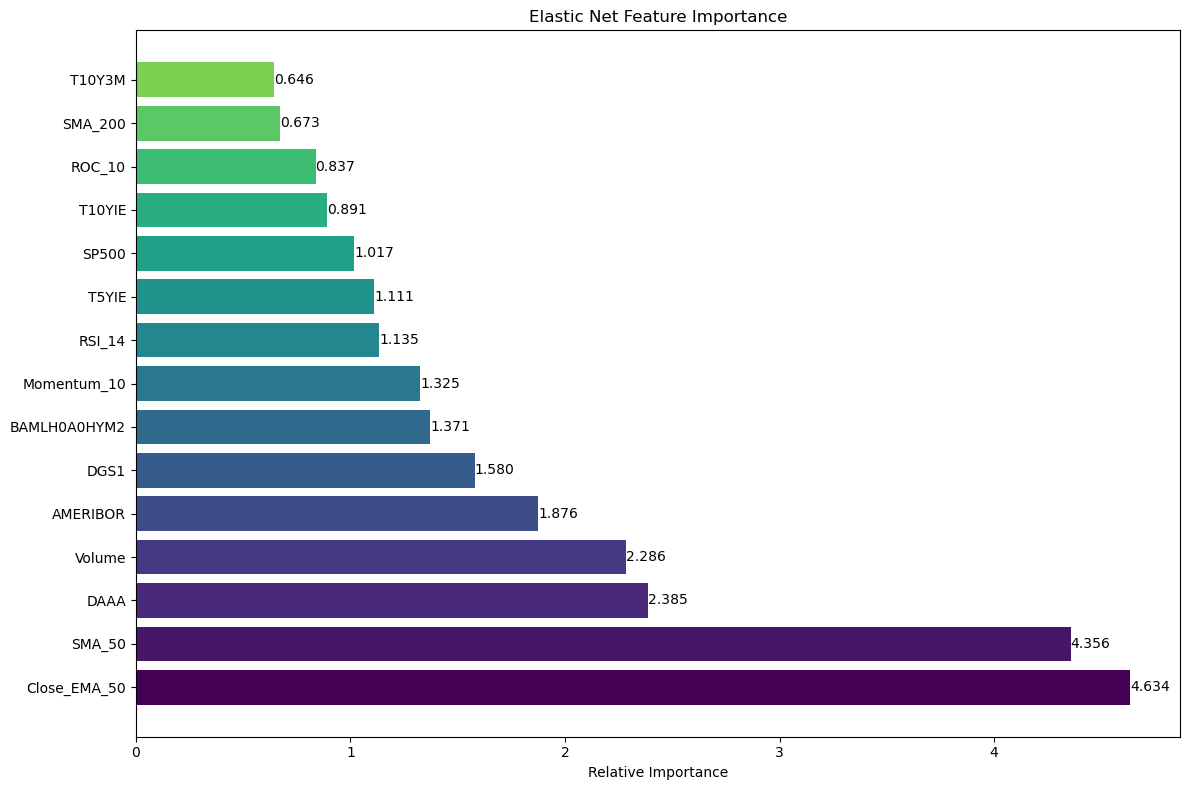


ElasticNet Feature Stability Analysis:
         Feature  Stability Score
21     Sentiment         0.151499
22      Interest         0.299685
3          DGS10         0.304189
2         T10Y3M         0.366337
20     VIX_Close         0.453582
7         VIXCLS         0.464369
17   Momentum_10         0.467207
5       CBBTCUSD         0.485978
13        RSI_14         0.535557
12          DGS1         0.602318
6         T10YIE         0.698342
19       SMA_200         0.712573
14           OBV         0.747783
16        ROC_10         0.798686
11  BAMLH0A0HYM2         0.820283
1          SP500         0.935201
10         T5YIE         1.450169
15  Close_EMA_50         1.497749
18        SMA_50         1.792407
0         Volume         2.229434
8           DAAA         2.593451
9       AMERIBOR         2.692239
4        DEXUSEU         2.809781


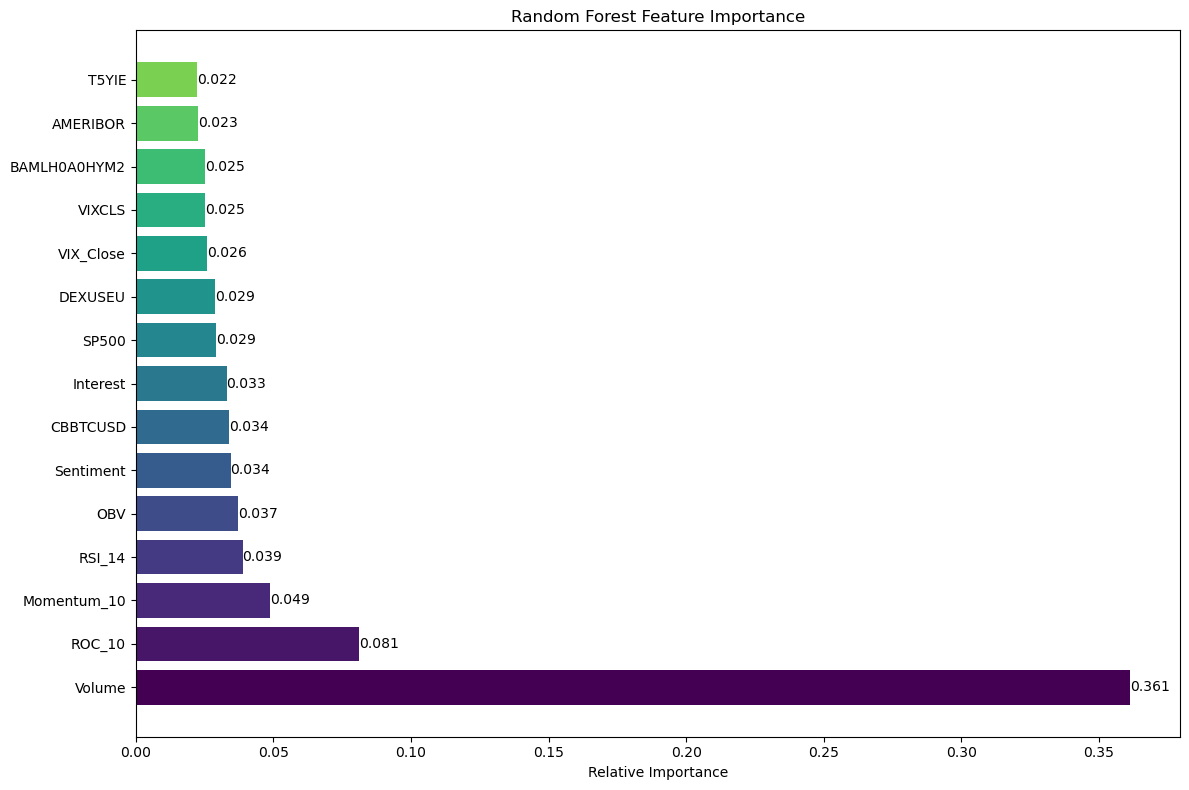


RandomForestRegressor Feature Stability Analysis:
         Feature  Stability Score
8           DAAA         0.000573
2         T10Y3M         0.001375
12          DGS1         0.001821
5       CBBTCUSD         0.002683
21     Sentiment         0.002825
10         T5YIE         0.003099
6         T10YIE         0.003181
15  Close_EMA_50         0.003849
11  BAMLH0A0HYM2         0.003857
19       SMA_200         0.004086
9       AMERIBOR         0.004273
1          SP500         0.004289
3          DGS10         0.006493
18        SMA_50         0.006495
17   Momentum_10         0.006991
14           OBV         0.009017
13        RSI_14         0.009896
16        ROC_10         0.010252
7         VIXCLS         0.013938
20     VIX_Close         0.015112
22      Interest         0.019390
4        DEXUSEU         0.023930
0         Volume         0.037400


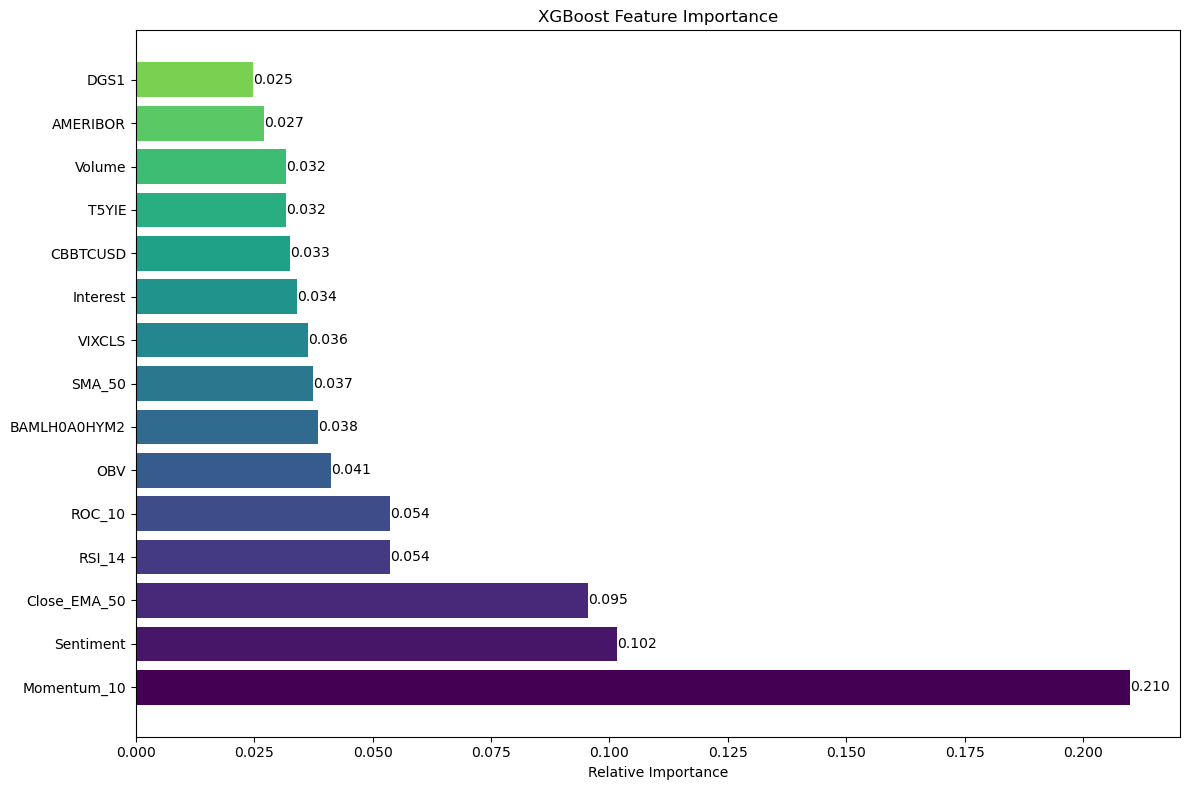


XGBRegressor Feature Stability Analysis:
         Feature  Stability Score
5       CBBTCUSD         0.002665
12          DGS1         0.005157
6         T10YIE         0.005418
11  BAMLH0A0HYM2         0.005915
13        RSI_14         0.008463
2         T10Y3M         0.008783
9       AMERIBOR         0.008955
3          DGS10         0.011671
19       SMA_200         0.012413
20     VIX_Close         0.013166
14           OBV         0.013414
8           DAAA         0.014769
22      Interest         0.015954
4        DEXUSEU         0.017884
15  Close_EMA_50         0.018377
16        ROC_10         0.021136
0         Volume         0.021820
21     Sentiment         0.026325
10         T5YIE         0.027436
18        SMA_50         0.031078
7         VIXCLS         0.031589
1          SP500         0.038797
17   Momentum_10         0.093905


In [21]:
def run_model_analysis(model, model_name, X_scaled, y, feature_columns):
    """
    Train model, evaluate feature importance and stability, and plot results
    """
    model.fit(X_scaled, y)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        importances = np.abs(model.coef_)
    
    plot_feature_importance(importances, feature_columns, f'{model_name} Feature Importance')
    evaluate_feature_stability(model, X_scaled, y, feature_columns)
    return importances

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge_importances = run_model_analysis(ridge, 'Ridge Regression', X_scaled, y, feature_columns)

# LASSO Regression
lasso = Lasso(alpha=0.01)
lasso_importances = run_model_analysis(lasso, 'LASSO Regression', X_scaled, y, feature_columns)

# Elastic Net
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net_importances = run_model_analysis(elastic_net, 'Elastic Net', X_scaled, y, feature_columns)


# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_importances = run_model_analysis(rf, 'Random Forest', X_scaled, y, feature_columns)

# XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb_importances = run_model_analysis(xgb, 'XGBoost', X_scaled, y, feature_columns)

### Feature Importance Summary

In [23]:
# Create feature importance comparison DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Ridge_Importance': ridge_importances,
    'LASSO_Importance': lasso_importances,
    'ElasticNet_Importance': elastic_net_importances,
    'RandomForest_Importance': rf_importances,
    'XGBoost_Importance': xgb_importances
})

# Add average importance and sort
feature_importance_df['Average_Importance'] = feature_importance_df.iloc[:, 1:].mean(axis=1)
feature_importance_df = feature_importance_df.sort_values('Average_Importance', ascending=False)

# Print summary results
print("\nFeature Importance Summary:")
print(feature_importance_df)

# Print top features for each model
print("\nTop Feature by Model:")
for column in feature_importance_df.columns[1:-1]:
    top_feature = feature_importance_df.nlargest(1, column)
    print(f"{column}: {top_feature['Feature'].values[0]} (Importance: {top_feature[column].values[0]:.3f})")

# Save results to CSV
feature_importance_df.to_csv('NFLX_feature_importance_results.csv', index=False)


Feature Importance Summary:
         Feature  Ridge_Importance  LASSO_Importance  ElasticNet_Importance  \
15  Close_EMA_50         13.623809         15.161118               4.634302   
18        SMA_50         11.818139         13.364776               4.356436   
9       AMERIBOR          5.155591          4.042719               1.876187   
8           DAAA          3.176383          2.677881               2.385250   
0         Volume          2.373393          2.349388               2.286196   
12          DGS1          3.041222          1.179306               1.579623   
1          SP500          2.585820          1.591489               1.016843   
10         T5YIE          2.122303          1.834669               1.110803   
11  BAMLH0A0HYM2          1.806441          1.357389               1.371476   
17   Momentum_10          1.440820          1.526187               1.324782   
13        RSI_14          1.194231          1.164822               1.134848   
6         T10YIE       